## Data

CRSP data

https://crsp.org/files/ccm_files/BalanceSheetQuarterly.html

In [41]:
## Importing 
#from jupyterthemes import jtplot
#jtplot.style('gruvboxl')

import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

import sys
sys.path.append('..') #now I'm in the parent directory
from src.random_matrix import *
from src.csv_data.to_clean import *

%matplotlib inline
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = [10,10]  # Set default figure size

In [2]:
# Enter the path to the folder on your desktop where the CSV file is stored
folder_path = "/Users/pietrobicocchi/Desktop/project/data/CompStat"

In [3]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(f"{folder_path}/crsp_ccm_inventories_sales.csv")

In [42]:
sales, prices = df_to_sales(df)
returns_sales = clean_returns(sales)
returns_prices = clean_returns(prices)

/Users/pietrobicocchi/Desktop/project/notebooks/../src/csv_data/to_clean.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datadate"] = pd.to_datetime(df["datadate"])
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [48]:
returns_sales

GVKEY,1004,1009,1010,1011,1013,1017,1020,1021,1025,1028,...,279431,285135,285313,287111,287252,287462,287882,294524,295786,296697
datadate,,,,,,,,,,,,,,,,,,,,,
1961-06-30,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1961-09-30,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1961-12-31,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1962-03-31,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1962-06-30,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,0.066074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.383018,2.139621,1.102190,0.209898,0.066249,0.002909,1.133886,1.483900,0.984851,0.844083
2022-06-30,0.033697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.576223,1.710176,0.109461,-0.292286,-0.038271,1.079012,1.183637,0.993367,1.197687,0.075368
2022-09-30,-0.568876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.521607,0.266019,1.188414,0.940006,-0.101167,0.394670,0.429062,-0.163566,1.525177,0.226189


In [55]:
(resc_log_ret[1004] == returns_sales[1004]).any()

True

In [5]:
df["datadate"] = pd.to_datetime(df["datadate"])

In [6]:
df = df[['GVKEY', 'datadate', 'saleq', 'prccq']]

In [7]:
aggregated = df.groupby([df["datadate"], df["GVKEY"]]).agg({"saleq":"sum", "prccq":"first"}).unstack()

In [8]:
aggregated.columns

MultiIndex([('saleq',   1000),
            ('saleq',   1001),
            ('saleq',   1003),
            ('saleq',   1004),
            ('saleq',   1005),
            ('saleq',   1007),
            ('saleq',   1008),
            ('saleq',   1009),
            ('saleq',   1010),
            ('saleq',   1011),
            ...
            ('prccq', 345980),
            ('prccq', 347007),
            ('prccq', 347085),
            ('prccq', 348892),
            ('prccq', 349530),
            ('prccq', 349972),
            ('prccq', 349994),
            ('prccq', 350681),
            ('prccq', 351038),
            ('prccq', 353444)],
           names=[None, 'GVKEY'], length=52698)

In [9]:
sales = aggregated["saleq"].resample("Q").sum()
prices= aggregated["prccq"].resample("Q").last()

In [10]:
sales.isna().any().any() # No nan if false. any() looks if there's any true value in each columns  

False

In [27]:
print(len(sales.columns), len(prices.columns))

12236 26349


In [12]:
sales
sales = sales.replace(0, np.nan)

In [13]:
sales = sales.drop(sales.columns[sales.apply(lambda col: col.notnull().sum() < 28)], axis=1)
len(sales)

12236

In [14]:
sales = sales.fillna(0)

In [15]:
log_ret = np.log(sales).diff(4)
log_ret.replace([np.inf, -np.inf], np.nan, inplace=True)
#log_return = log_return.fillna(0)
 
log_ret

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


GVKEY,1000,1004,1009,1010,1011,1012,1013,1017,1019,1020,...,296318,296697,296885,297209,312009,315318,315887,316056,317264,317427
datadate,,,,,,,,,,,,,,,,,,,,,
1961-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,NaN,0.093144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.593319,-0.451159,NaN,0.114116,0.212287,-0.980735,0.041335,-0.223286,-0.019619
2022-06-30,NaN,0.087299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165354,-0.158734,NaN,0.569338,0.143180,0.484021,0.034477,0.196832,-0.049228
2022-09-30,NaN,-0.021497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.249320,-0.207942,NaN,0.799431,0.003726,0.700065,0.242426,0.184030,-0.011971


In [16]:
resc_log_ret =( log_ret - log_ret.mean() )/log_ret.std()
resc_log_ret = resc_log_ret.fillna(0)

resc_log_ret

GVKEY,1000,1004,1009,1010,1011,1012,1013,1017,1019,1020,...,296318,296697,296885,297209,312009,315318,315887,316056,317264,317427
datadate,,,,,,,,,,,,,,,,,,,,,
1961-06-30,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1961-09-30,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1961-12-31,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1962-03-31,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1962-06-30,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,0.0,0.066074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.844083,-0.338962,0.0,0.028613,0.152682,-2.023532,-0.148338,-0.696199,-0.652565
2022-06-30,0.0,0.033697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.075368,-0.233140,0.0,1.037889,0.007347,0.540044,-0.227638,0.071633,-0.863680
2022-09-30,0.0,-0.568876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.226189,-0.250947,0.0,1.548030,-0.285935,0.918157,2.177093,0.048235,-0.598027


### correlations

In [17]:
%%time
corr = resc_log_ret.corr(method= 'pearson', min_periods=8)

CPU times: user 1min 38s, sys: 1.82 s, total: 1min 39s
Wall time: 1min 40s


In [18]:
corr

GVKEY,1000,1004,1009,1010,1011,1012,1013,1017,1019,1020,...,296318,296697,296885,297209,312009,315318,315887,316056,317264,317427
GVKEY,,,,,,,,,,,,,,,,,,,,,
1000,1.000000e+00,0.071878,3.706244e-33,8.221768e-02,1.566418e-33,-2.835377e-33,5.804067e-33,-8.712987e-33,1.848927e-33,1.709379e-02,...,-2.694014e-34,-1.305137e-35,1.303419e-33,3.053309e-34,2.522761e-34,1.158840e-33,2.190095e-34,3.271329e-34,4.784361e-34,1.931045e-34
1004,7.187844e-02,1.000000,-1.633230e-02,1.529966e-01,-2.603898e-02,-3.093944e-02,3.096177e-01,7.829436e-02,-3.995828e-02,1.266869e-01,...,-1.581453e-01,1.609265e-01,-1.018265e-01,-1.098641e-03,7.645122e-02,-3.295680e-02,2.727733e-02,1.334458e-01,1.061406e-01,-4.527723e-02
1009,3.706244e-33,-0.016332,1.000000e+00,8.235242e-03,1.704040e-01,2.319761e-01,-2.720074e-02,-1.729968e-01,1.530732e-01,-5.525523e-02,...,2.071279e-34,9.090234e-34,-1.751686e-33,-2.485601e-34,-1.070385e-36,-2.771368e-34,-1.287900e-33,1.584521e-34,-3.590181e-37,-5.628866e-34
1010,8.221768e-02,0.152997,8.235242e-03,1.000000e+00,-1.159826e-34,-2.574722e-02,2.800506e-02,-3.996936e-02,-8.999596e-02,-4.457040e-02,...,7.386785e-35,2.600414e-35,-1.806124e-34,-1.928339e-34,-1.760700e-35,-2.837316e-34,-2.455047e-34,-1.211106e-34,-3.130071e-35,3.562762e-35
1011,1.566418e-33,-0.026039,1.704040e-01,-1.159826e-34,1.000000e+00,1.321026e-01,7.177103e-02,6.223556e-02,-1.421129e-01,-5.362979e-02,...,-3.090182e-33,7.069690e-35,2.199774e-33,1.769479e-35,-1.861676e-34,-1.244465e-33,2.140289e-33,8.126348e-34,4.580971e-37,3.838312e-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315318,1.158840e-33,-0.032957,-2.771368e-34,-2.837316e-34,-1.244465e-33,-1.338054e-33,8.530824e-34,8.879012e-34,1.291290e-34,-3.491289e-35,...,3.087347e-01,1.394056e-01,-5.024628e-01,2.421116e-01,-4.881446e-02,1.000000e+00,-1.792011e-01,-2.238388e-01,3.663619e-01,-2.097282e-01
315887,2.190095e-34,0.027277,-1.287900e-33,-2.455047e-34,2.140289e-33,-1.069748e-33,-1.260368e-33,1.796517e-33,2.303190e-34,2.233116e-34,...,-2.490690e-01,1.011971e-01,-3.321897e-02,-7.547304e-02,-1.761646e-02,-1.792011e-01,1.000000e+00,5.473496e-01,-8.901170e-02,2.396925e-01
316056,3.271329e-34,0.133446,1.584521e-34,-1.211106e-34,8.126348e-34,5.696801e-37,-6.240122e-34,-1.184706e-33,-4.253461e-35,-4.369367e-34,...,-2.003460e-01,5.696117e-01,1.148783e-02,1.013694e-01,-4.476646e-02,-2.238388e-01,5.473496e-01,1.000000e+00,-1.473214e-01,9.234151e-03


In [19]:
%%time
corr = corr.replace([np.nan, np.inf, -np.inf], 0)

CPU times: user 11.2 s, sys: 2.51 s, total: 13.7 s
Wall time: 13.8 s


In [74]:
#eVal0 , eVec0 = eigenvalues, eigenvectors
#len(eigenvalues)

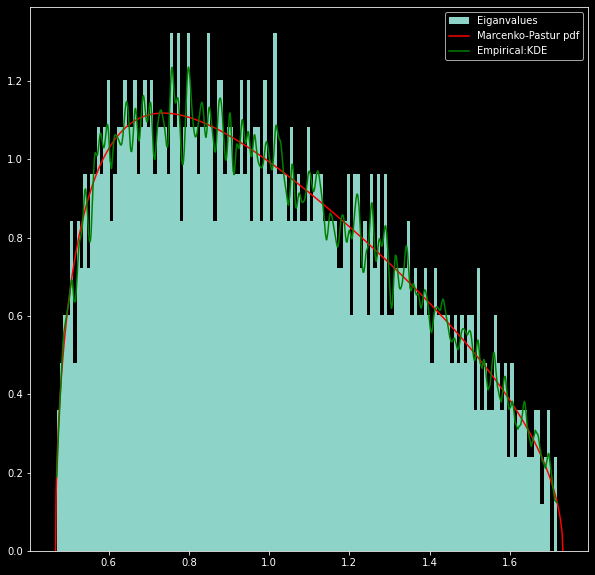

In [37]:
N = 1000
T = 10000
x = np.random.normal(0, 1, size = (T, N))
cor_random = np.corrcoef(x, rowvar=0) # cor.shape = (1000,1000). If rowvar=1 - row represents a var, with observations in the columns.
eVal0 , eVec0 = getPCA(cor_random) 
pdf0 = mpPDF(1., q=x.shape[0]/float(x.shape[1]), pts=N)
pdf1 = fitKDE(np.diag(eVal0), bWidth=.005) #empirical pdf


# KDE and Marcenko-Pastur, and histogram
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal0), density = True, bins=150, label="Eiganvalues") # Histogram the eigenvalues
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")


#plotting
#plt.yscale('log') ## lOG SCALE
plt.legend(loc="upper right")
plt.show()

In [23]:
%%time
#get eigendecomposition
eVal0 , eVec0 = getPCA( corr ) 

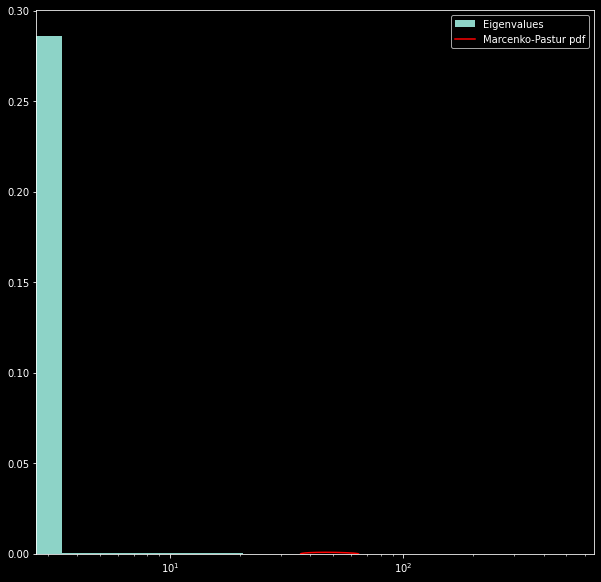

In [34]:
N = len(corr)
T = len(resc_log_ret)
Q = T/N

#pdf1 = fitKDE(np.diag(eVal0), bWidth=.005) #empirical pdf
pdf0 = mpPDF(1., Q, pts=N)

# KDE and Marcenko-Pastur, and histogram
fig = plt.figure()
ax  = fig.add_subplot(111)

ax.hist(np.diag(eVal0), density = True, bins=150, label="Eigenvalues") # Histogram the eigenvalues

#keep this if you're not using the function PCA but directly eig of linalg
#ax.hist(eVal0, density = True, bins=150, label="Eiganvalues")
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
#plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")


#plotting
#plt.yscale('log') 
plt.xscale('log')
plt.legend(loc="upper right")
plt.show()

In [35]:
eVal0[-1]

array([  0.        ,   0.        ,   0.        , ...,   0.        ,
         0.        , 514.90740955])

NameError: name 'eVec0' is not defined

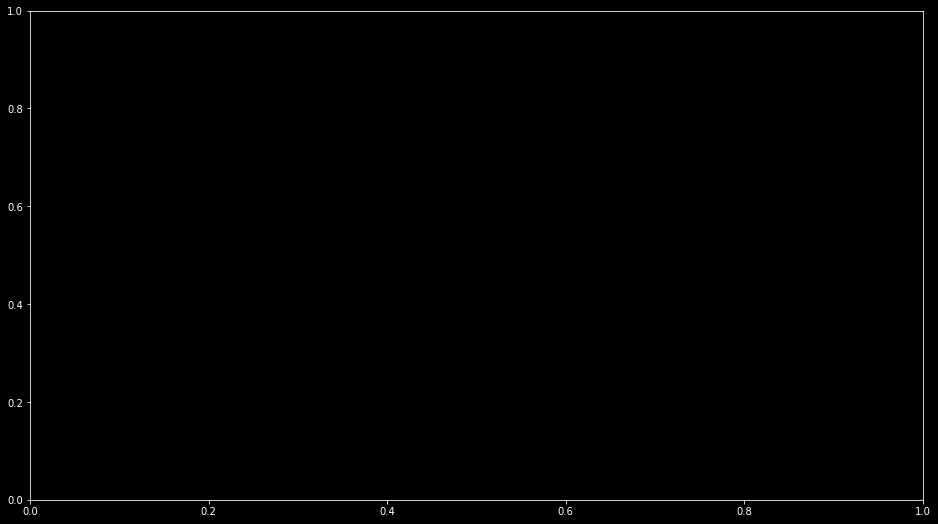

In [20]:
#eVal0 , eVec0 = getPCA( corr ) 

# First mode 
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(eVec0[:, -1].flatten())
ax.axhline(0, c="green")
ax.axhline([1 / (len(corr))**0.5], c="red")
#ax.set_ylim(-0.05, 0.2)
plt.show()